In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
df=pd.read_csv("dataset.csv")

In [78]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [80]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

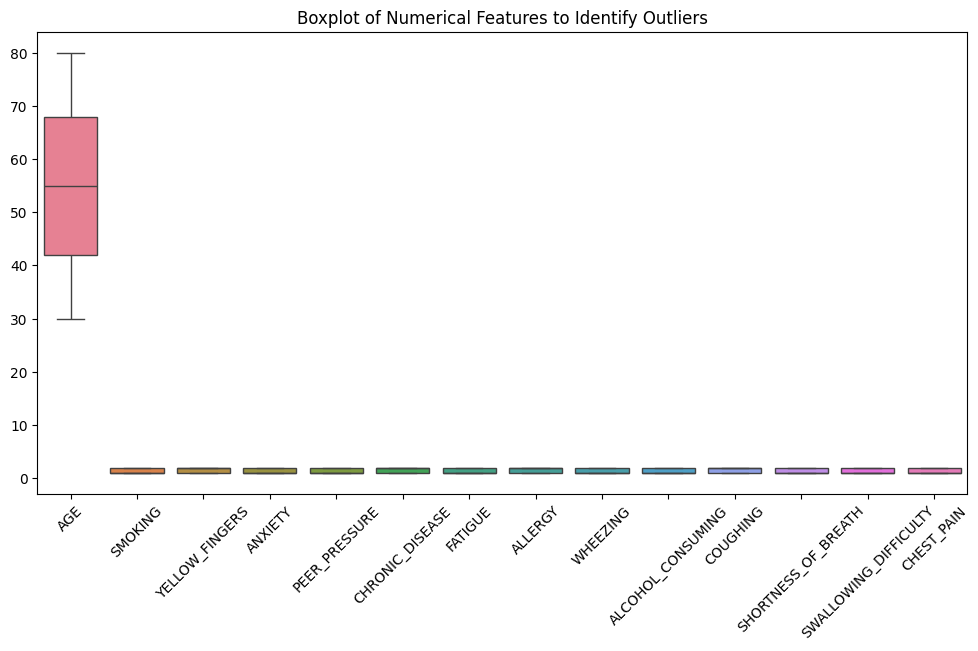

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing outliers using boxplot for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features to Identify Outliers')
plt.xticks(rotation=45)
plt.show()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [83]:
# labelencoding for numeric catagorical value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_c=df[['GENDER','SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']]
for col in df_c.columns:
  df[col]=le.fit_transform(df[col])

In [84]:
for col in df_c.columns:
  print(df[col].value_counts())

GENDER
1    1514
0    1486
Name: count, dtype: int64
SMOKING
0    1527
1    1473
Name: count, dtype: int64
YELLOW_FINGERS
1    1542
0    1458
Name: count, dtype: int64
ANXIETY
0    1518
1    1482
Name: count, dtype: int64
PEER_PRESSURE
0    1503
1    1497
Name: count, dtype: int64
CHRONIC_DISEASE
1    1529
0    1471
Name: count, dtype: int64
FATIGUE
0    1531
1    1469
Name: count, dtype: int64
ALLERGY
1    1520
0    1480
Name: count, dtype: int64
WHEEZING
0    1508
1    1492
Name: count, dtype: int64
ALCOHOL_CONSUMING
0    1526
1    1474
Name: count, dtype: int64
COUGHING
1    1532
0    1468
Name: count, dtype: int64
SHORTNESS_OF_BREATH
0    1536
1    1464
Name: count, dtype: int64
SWALLOWING_DIFFICULTY
0    1531
1    1469
Name: count, dtype: int64
CHEST_PAIN
0    1504
1    1496
Name: count, dtype: int64
LUNG_CANCER
1    1518
0    1482
Name: count, dtype: int64


In [85]:
# Convert boolean data values to numerical values
# This will convert True to 1 and False to 0

# First, identify boolean columns
bool_columns = df.select_dtypes(include=['bool']).columns

# Display the number of boolean columns found
print(f"Number of boolean columns found: {len(bool_columns)}")

# Convert boolean columns to integers (True becomes 1, False becomes 0)
for column in bool_columns:
    df[column] = df[column].astype(int)

# Verify the conversion by checking data types
print("\nData types after conversion:")
print(df.dtypes.value_counts())

# Display a sample of the converted data
print("\nSample of data after boolean conversion:")
print(df.head(3))


Number of boolean columns found: 0

Data types after conversion:
int64    16
Name: count, dtype: int64

Sample of data after boolean conversion:
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   65        0               0        0              1   
1       0   55        0               1        1              0   
2       0   78        1               1        0              0   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                1        0        1         1                  1         1   
1                0        1        1         1                  0         0   
2                0        1        0         1                  0         0   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  LUNG_CANCER  
0                    1                      1           0            0  
1                    0                      1           1            0  
2                    1                      0     

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 3000 non-null   int64
 1   AGE                    3000 non-null   int64
 2   SMOKING                3000 non-null   int64
 3   YELLOW_FINGERS         3000 non-null   int64
 4   ANXIETY                3000 non-null   int64
 5   PEER_PRESSURE          3000 non-null   int64
 6   CHRONIC_DISEASE        3000 non-null   int64
 7   FATIGUE                3000 non-null   int64
 8   ALLERGY                3000 non-null   int64
 9   WHEEZING               3000 non-null   int64
 10  ALCOHOL_CONSUMING      3000 non-null   int64
 11  COUGHING               3000 non-null   int64
 12  SHORTNESS_OF_BREATH    3000 non-null   int64
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64
 14  CHEST_PAIN             3000 non-null   int64
 15  LUNG_CANCER            3000 non-null  

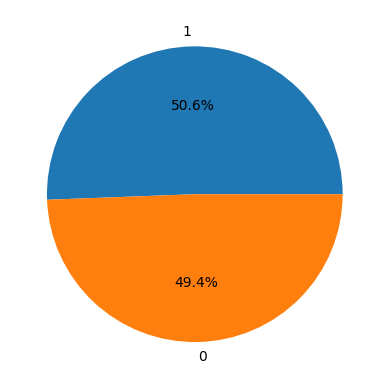

In [87]:
plt.pie(df['LUNG_CANCER'].value_counts(),labels=df['LUNG_CANCER'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [88]:
#checking duplicate value
for i in df.columns:
  print(f"For {i}: ",df[i].duplicated().sum())

For GENDER:  2998
For AGE:  2949
For SMOKING:  2998
For YELLOW_FINGERS:  2998
For ANXIETY:  2998
For PEER_PRESSURE:  2998
For CHRONIC_DISEASE:  2998
For FATIGUE:  2998
For ALLERGY:  2998
For WHEEZING:  2998
For ALCOHOL_CONSUMING:  2998
For COUGHING:  2998
For SHORTNESS_OF_BREATH:  2998
For SWALLOWING_DIFFICULTY:  2998
For CHEST_PAIN:  2998
For LUNG_CANCER:  2998


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 3000 non-null   int64
 1   AGE                    3000 non-null   int64
 2   SMOKING                3000 non-null   int64
 3   YELLOW_FINGERS         3000 non-null   int64
 4   ANXIETY                3000 non-null   int64
 5   PEER_PRESSURE          3000 non-null   int64
 6   CHRONIC_DISEASE        3000 non-null   int64
 7   FATIGUE                3000 non-null   int64
 8   ALLERGY                3000 non-null   int64
 9   WHEEZING               3000 non-null   int64
 10  ALCOHOL_CONSUMING      3000 non-null   int64
 11  COUGHING               3000 non-null   int64
 12  SHORTNESS_OF_BREATH    3000 non-null   int64
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64
 14  CHEST_PAIN             3000 non-null   int64
 15  LUNG_CANCER            3000 non-null  

In [90]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [91]:
df[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']].describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,0.491000,0.514000,0.494000,0.499000,0.509667,0.489667,0.506667,0.497333,0.491333,0.510667,0.488000,0.489667,0.498667,0.506000
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082,0.500047
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,68.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Distribution of cancer  Status categories:
lung_cancer_Status
Mild_stage    3000
Name: count, dtype: int64


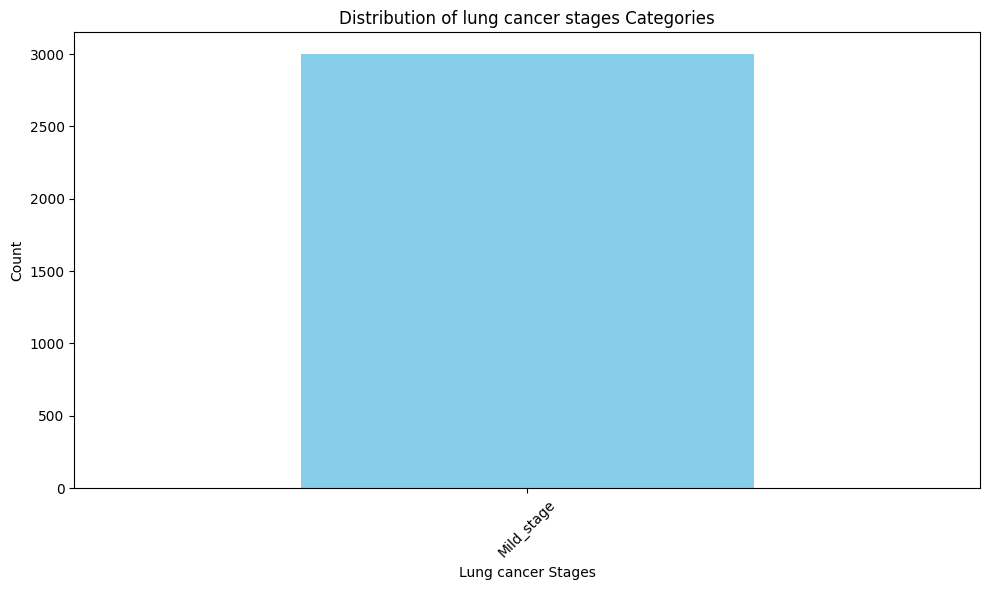


Correlation between lung cancer chances and key features:
- SMOKING: nan
- YELLOW_FINGERS: nan
- ANXIETY: nan
- PEER_PRESSURE: nan
- CHRONIC_DISEASE: nan
- FATIGUE: nan
- ALLERGY: nan
- WHEEZING: nan
- ALCOHOL_CONSUMING: nan
- COUGHING: nan
- SHORTNESS_OF_BREATH: nan
- SWALLOWING_DIFFICULTY: nan
- CHEST_PAIN: nan


d:\ML_ASIF_OWN PROJCET\Lung_Cancer\Lung_Cancer_Identification\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\ML_ASIF_OWN PROJCET\Lung_Cancer\Lung_Cancer_Identification\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [92]:
# Feature Engineering: Create Mental Status column based on relevant features

# Define the features that contribute to mental status assessment
lung_cancer_predicted = [
   'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN'
]

# Create a function to calculate lung cancer predicted score
def calculate_status(row):
    # Extract relevant features that exist in the dataframe
    valid_features = [f for f in lung_cancer_predicted if f in row.index]
    
    if not valid_features:
        return "Unknown"  # No relevant features found
    
    # Calculate the average score from available features
    total_score = sum(row[feature] for feature in valid_features)
    avg_score = total_score / len(valid_features)
    
    # Classify based on average score
    if avg_score <= 1.5:
        return "Mild_stage"
    elif avg_score <= 2.5:
        return "Minimal_Moderate_stage"
    elif avg_score <= 3.5:
        return "Moderately_stage"
    elif avg_score <= 4.5:
        return "Severe_stage"
    else:
        return "Extremely Severe_stage"

# Apply the function to create the new column
df['lung_cancer_Status'] = df.apply(calculate_status, axis=1)

# Display the distribution of lung cancer status categories
lungcancer_status_counts = df['lung_cancer_Status'].value_counts()
print("\nDistribution of cancer  Status categories:")
print(lungcancer_status_counts)

# Visualize the distribution
plt.figure(figsize=(10, 6))
lungcancer_status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of lung cancer stages Categories')
plt.xlabel('Lung cancer Stages')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check correlation between lung cancer chances and other key features
print("\nCorrelation between lung cancer chances and key features:")
# Convert lung cancer chances to numeric for correlation analysis
status_mapping = {
    'Mild_stage': 1, 
    'Minimal_Moderate_stage': 2, 
    'Moderately_stage': 3, 
    'Severe_stage': 4, 
    'Extremely Severe_stage': 5
}
df['lung cancer_Status_Numeric'] = df['lung_cancer_Status'].map(status_mapping)

# Calculate correlations with key features
for feature in [f for f in lung_cancer_predicted if f in df.columns]:
    correlation = df['lung cancer_Status_Numeric'].corr(df[feature])
    print(f"- {feature}: {correlation:.4f}")


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   GENDER                      3000 non-null   int64 
 1   AGE                         3000 non-null   int64 
 2   SMOKING                     3000 non-null   int64 
 3   YELLOW_FINGERS              3000 non-null   int64 
 4   ANXIETY                     3000 non-null   int64 
 5   PEER_PRESSURE               3000 non-null   int64 
 6   CHRONIC_DISEASE             3000 non-null   int64 
 7   FATIGUE                     3000 non-null   int64 
 8   ALLERGY                     3000 non-null   int64 
 9   WHEEZING                    3000 non-null   int64 
 10  ALCOHOL_CONSUMING           3000 non-null   int64 
 11  COUGHING                    3000 non-null   int64 
 12  SHORTNESS_OF_BREATH         3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY       3000 non-null   int6

d:\ML_ASIF_OWN PROJCET\Lung_Cancer\Lung_Cancer_Identification\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\ML_ASIF_OWN PROJCET\Lung_Cancer\Lung_Cancer_Identification\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


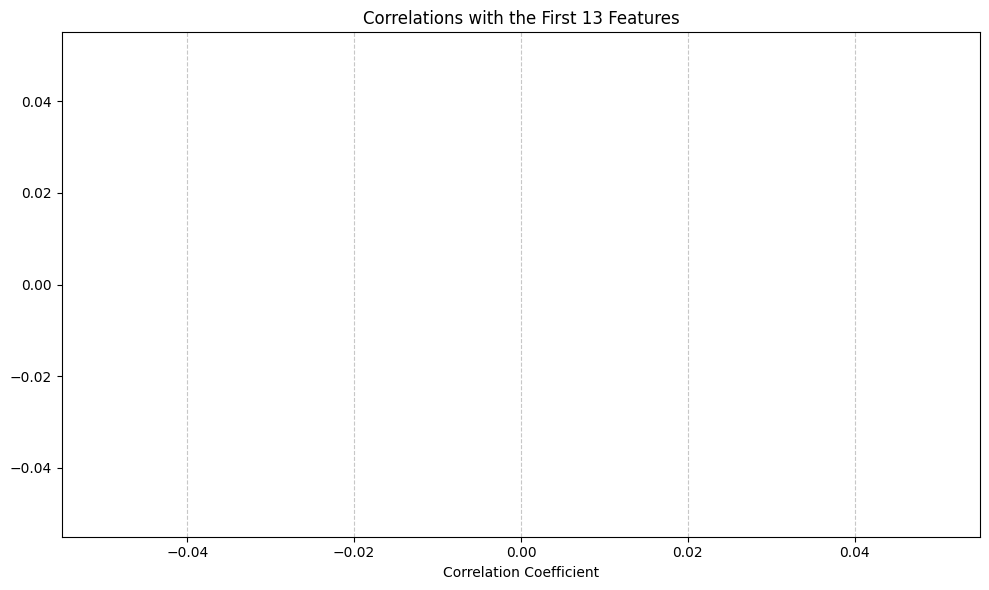

In [96]:
# Calculate correlations between lung cancer_Status_Numeric and the first 13 features
correlations_13 = {}
features_to_consider = df.columns[:13]  # Select the first 13 features

for feature in features_to_consider:
    if feature not in ['lung_cancer_Status', 'lung cancer_Status_Numeric']:
        try:
            corr = df['lung cancer_Status_Numeric'].corr(df[feature])
            if not pd.isna(corr):  # Only include non-NaN correlations
                correlations_13[feature] = corr
        except:
            continue

# Convert to DataFrame and sort by absolute correlation value
corr_13_df = pd.DataFrame(list(correlations_13.items()), columns=['Feature', 'Correlation'])
corr_13_df['Abs_Correlation'] = corr_13_df['Correlation'].abs()
corr_13_df = corr_13_df.sort_values('Abs_Correlation', ascending=False)

# Generate a figure to visualize the correlations
plt.figure(figsize=(10, 6))
plt.barh(corr_13_df['Feature'], corr_13_df['Correlation'], color='skyblue')
plt.xlabel('Correlation Coefficient')
plt.title('Correlations with the First 13 Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


d:\ML_ASIF_OWN PROJCET\Lung_Cancer\Lung_Cancer_Identification\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\ML_ASIF_OWN PROJCET\Lung_Cancer\Lung_Cancer_Identification\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


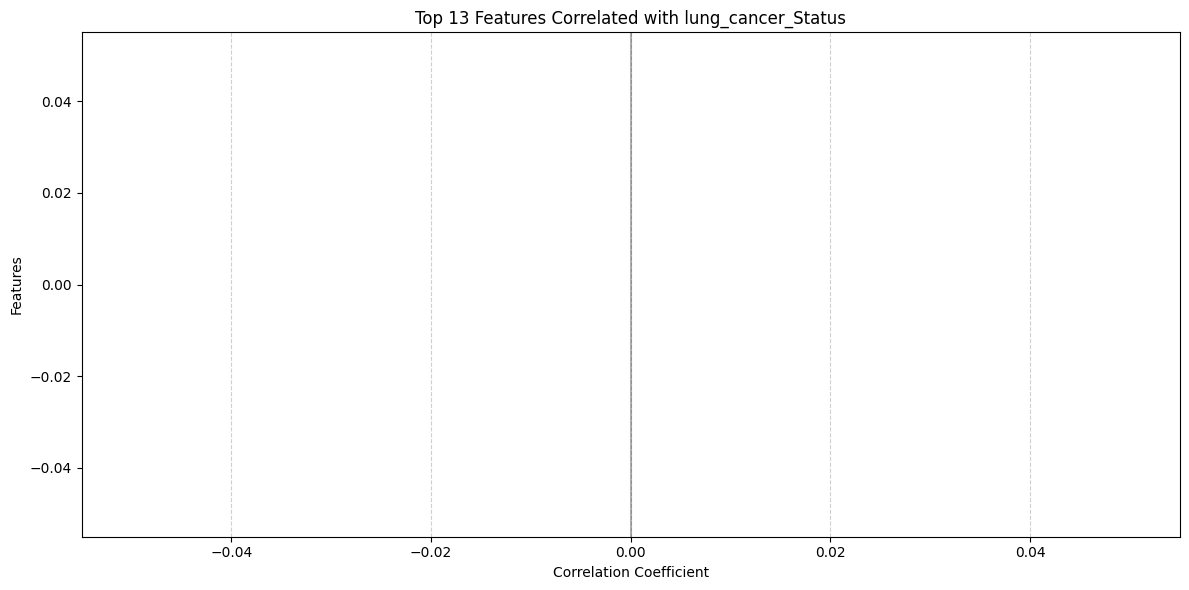


Top 13 features correlated with lung_cancer_Status:
Empty DataFrame
Columns: [Feature, Correlation]
Index: []


In [94]:
# Calculate correlations between lung cancer_Status_Numeric and all other features
correlations = {}
for column in df.columns:
    if column not in ['lung_cancer_Status', 'lung cancer_Status_Numeric']:
        try:
            corr = df['lung cancer_Status_Numeric'].corr(df[column])
            if not pd.isna(corr):  # Only include non-NaN correlations
                correlations[column] = corr
        except:
            continue

# Convert to DataFrame and sort by absolute correlation value
corr_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)

# Get top 15 features with highest correlation (absolute value)
top_features = corr_df.head(15).copy()

# Create a horizontal bar chart for top correlated features
plt.figure(figsize=(12, 6))
colors = ['red' if x < 0 else 'green' for x in top_features['Correlation']]
bars = plt.barh(top_features['Feature'], top_features['Correlation'], color=colors)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Top 13 Features Correlated with lung_cancer_Status')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add correlation values at the end of each bar
for i, bar in enumerate(bars):
    value = top_features['Correlation'].iloc[i]
    plt.text(value + (0.01 if value >= 0 else -0.01), 
             bar.get_y() + bar.get_height()/2, 
             f'{value:.3f}', 
             va='center', 
             ha='left' if value >= 0 else 'right',
             fontweight='bold')

plt.tight_layout()
plt.show()

# Drop the temporary column used for sorting
corr_df = corr_df.drop('Abs_Correlation', axis=1)

# Display top correlations
print("\nTop 13 features correlated with lung_cancer_Status:")
print(corr_df.head(15))
